In [21]:
import easyocr

In [22]:
ocrReader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [23]:
image_path = '../data/images/standard-grocery-receipt-template.png'
ocrReadResult = ocrReader.readtext(image_path)

c:\Users\ammar.jamalludin\Documents\Grocea\grocea-ml\.venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)


In [24]:
print(ocrReadResult)

[([[np.int32(58), np.int32(30)], [np.int32(288), np.int32(30)], [np.int32(288), np.int32(54)], [np.int32(58), np.int32(54)]], 'WALL-MART-SUPERSTORE', np.float64(0.7784574580591491)), ([[np.int32(123), np.int32(61)], [np.int32(181), np.int32(61)], [np.int32(181), np.int32(75)], [np.int32(123), np.int32(75)]], '(888 ) 888', np.float64(0.7173864666031371)), ([[np.int32(195), np.int32(61)], [np.int32(223), np.int32(61)], [np.int32(223), np.int32(75)], [np.int32(195), np.int32(75)]], '8888', np.float64(0.9955199956893921)), ([[np.int32(119), np.int32(73)], [np.int32(227), np.int32(73)], [np.int32(227), np.int32(87)], [np.int32(119), np.int32(87)]], 'MANAGER tod LINGA', np.float64(0.6835533017755151)), ([[np.int32(119), np.int32(87)], [np.int32(225), np.int32(87)], [np.int32(225), np.int32(103)], [np.int32(119), np.int32(103)]], '888 WALL STORE ST', np.float64(0.9165425382502655)), ([[np.int32(103), np.int32(101)], [np.int32(241), np.int32(101)], [np.int32(241), np.int32(117)], [np.int32(103

In [25]:
import os
import pandas as pd

rows = []
for item in ocrReadResult:
    bbox = item[0]  # list of 4 points
    text = item[1]
    conf = item[2] if len(item) > 2 else None
    # flatten bbox to x1,y1,...,x4,y4 and also keep a string representation
    coords = [int(c) for p in bbox for c in p]
    rows.append({
        "x1": coords[0], "y1": coords[1],
        "x2": coords[2], "y2": coords[3],
        "x3": coords[4], "y3": coords[5],
        "x4": coords[6], "y4": coords[7],
        "bbox": str([[int(p[0]), int(p[1])] for p in bbox]),
        "text": text,
        "confidence": float(conf) if conf is not None else None
    })

df = pd.DataFrame(rows)
output_path = '../data/outputs/ocr_results.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False, encoding='utf-8-sig')

# show table in notebook
df

,x1,y1,x2,y2,x3,y3,x4,y4,bbox,text,confidence
0,58,30,288,30,288,54,58,54,"[[58, 30], [288, 30], [288, 54], [58, 54]]",WALL-MART-SUPERSTORE,0.778457
1,123,61,181,61,181,75,123,75,"[[123, 61], [181, 61], [181, 75], [123, 75]]",(888 ) 888,0.717386
2,195,61,223,61,223,75,195,75,"[[195, 61], [223, 61], [223, 75], [195, 75]]",8888,0.995520
3,119,73,227,73,227,87,119,87,"[[119, 73], [227, 73], [227, 87], [119, 87]]",MANAGER tod LINGA,0.683553
4,119,87,225,87,225,103,119,103,"[[119, 87], [225, 87], [225, 103], [119, 103]]",888 WALL STORE ST,0.916543
5,103,101,241,101,241,117,103,117,"[[103, 101], [241, 101], [241, 117], [103, 117]]","WALL St CITY, La 88888",0.711122
6,15,123,93,123,93,137,15,137,"[[15, 123], [93, 123], [93, 137], [15, 137]]",ST# 2323 [Pr,0.138880
7,119,123,171,123,171,137,119,137,"[[119, 123], [171, 123], [171, 137], [119, 137]]",23432435,0.801169
8,271,123,293,123,293,137,271,137,"[[271, 123], [293, 123], [293, 137], [271, 137]]",TRE,0.215366
9,301,123,329,123,329,137,301,137,"[[301, 123], [329, 123], [329, 137], [301, 137]]",4354,0.999981


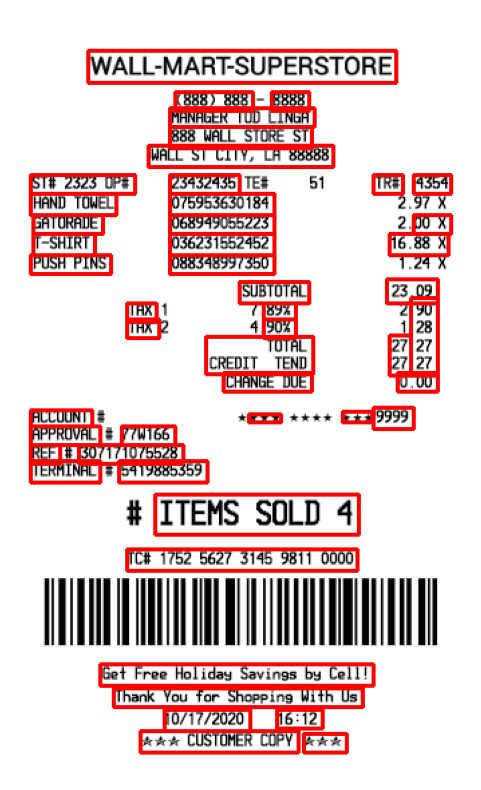

Saved visualization to ../outputs/ocr_bboxes.jpg


In [26]:
# Draw OCR bounding boxes on the image and display/save the result
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

if not os.path.exists(image_path):
    print(f"Image not found: {image_path}")
else:
    img = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(img)

    for item in ocrReadResult:
        bbox = item[0]
        # convert bbox points to integer tuples
        poly = [(int(p[0]), int(p[1])) for p in bbox]
        # draw polygon (closed) as box outline — no text labels
        draw.line(poly + [poly[0]], width=3, fill='red')

    plt.figure(figsize=(10,10))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

    out = '../outputs/ocr_bboxes.jpg'
    os.makedirs(os.path.dirname(out), exist_ok=True)
    img.save(out)
    print(f"Saved visualization to {out}")